# Creating your own dataset from Google Images

*by: Francisco Ingham and Jeremy Howard. Inspired by [Adrian Rosebrock](https://www.pyimagesearch.com/2017/12/04/how-to-create-a-deep-learning-dataset-using-google-images/)*

In this tutorial we will see how to easily create an image dataset through Google Images. **Note**: You will have to repeat these steps for any new category you want to Google (e.g once for dogs and once for cats).

In [9]:
from fastai.vision import *

In [10]:
project_data_basepath = pathlib.Path('/disks/data/paper_projects/selfie_detection/data')
path = (project_data_basepath/'DS_merged/data/train').resolve()

np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [11]:
# ImageDataBunch??

In [12]:
data.classes

['non_selfie', 'selfie']

In [13]:
# data.show_batch(rows=3, figsize=(7,8))

In [14]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['non_selfie', 'selfie'], 2, 2496, 624)

## Train model

In [18]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


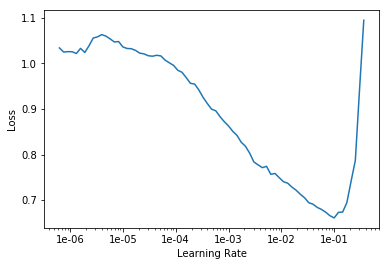

In [19]:
learn.lr_find()
learn.recorder.plot()

In [20]:
learn.fit_one_cycle(10, 2e-3)

In [21]:
learn.save('stage-1_resnet50')

In [22]:
learn.unfreeze()

In [23]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


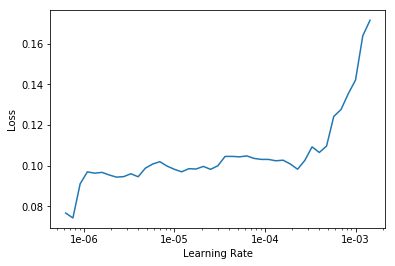

In [19]:
learn.recorder.plot()

In [24]:
learn.fit_one_cycle(2, max_lr=slice(1e-5,1e-5/3))

In [16]:
learn.fit_one_cycle(10, max_lr=slice(3e-4,3e-4/3))

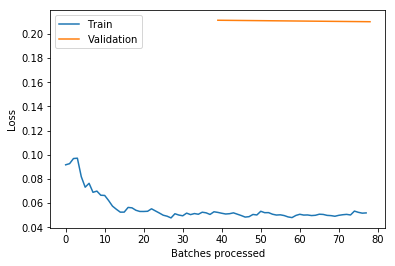

In [25]:
learn.recorder.plot_losses()

In [26]:
learn.save('stage-2_resnet50')

## Interpretation

In [27]:
learn.load('stage-1_resnet50');

In [28]:
interp = ClassificationInterpretation.from_learner(learn)

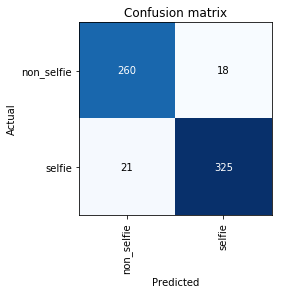

In [29]:
interp.plot_confusion_matrix()

In [30]:
confusion_mat = interp.confusion_matrix()
confusion_mat/np.sum(confusion_mat, axis = 1).reshape(-1,1)

array([[0.935252, 0.064748],
       [0.060694, 0.939306]])

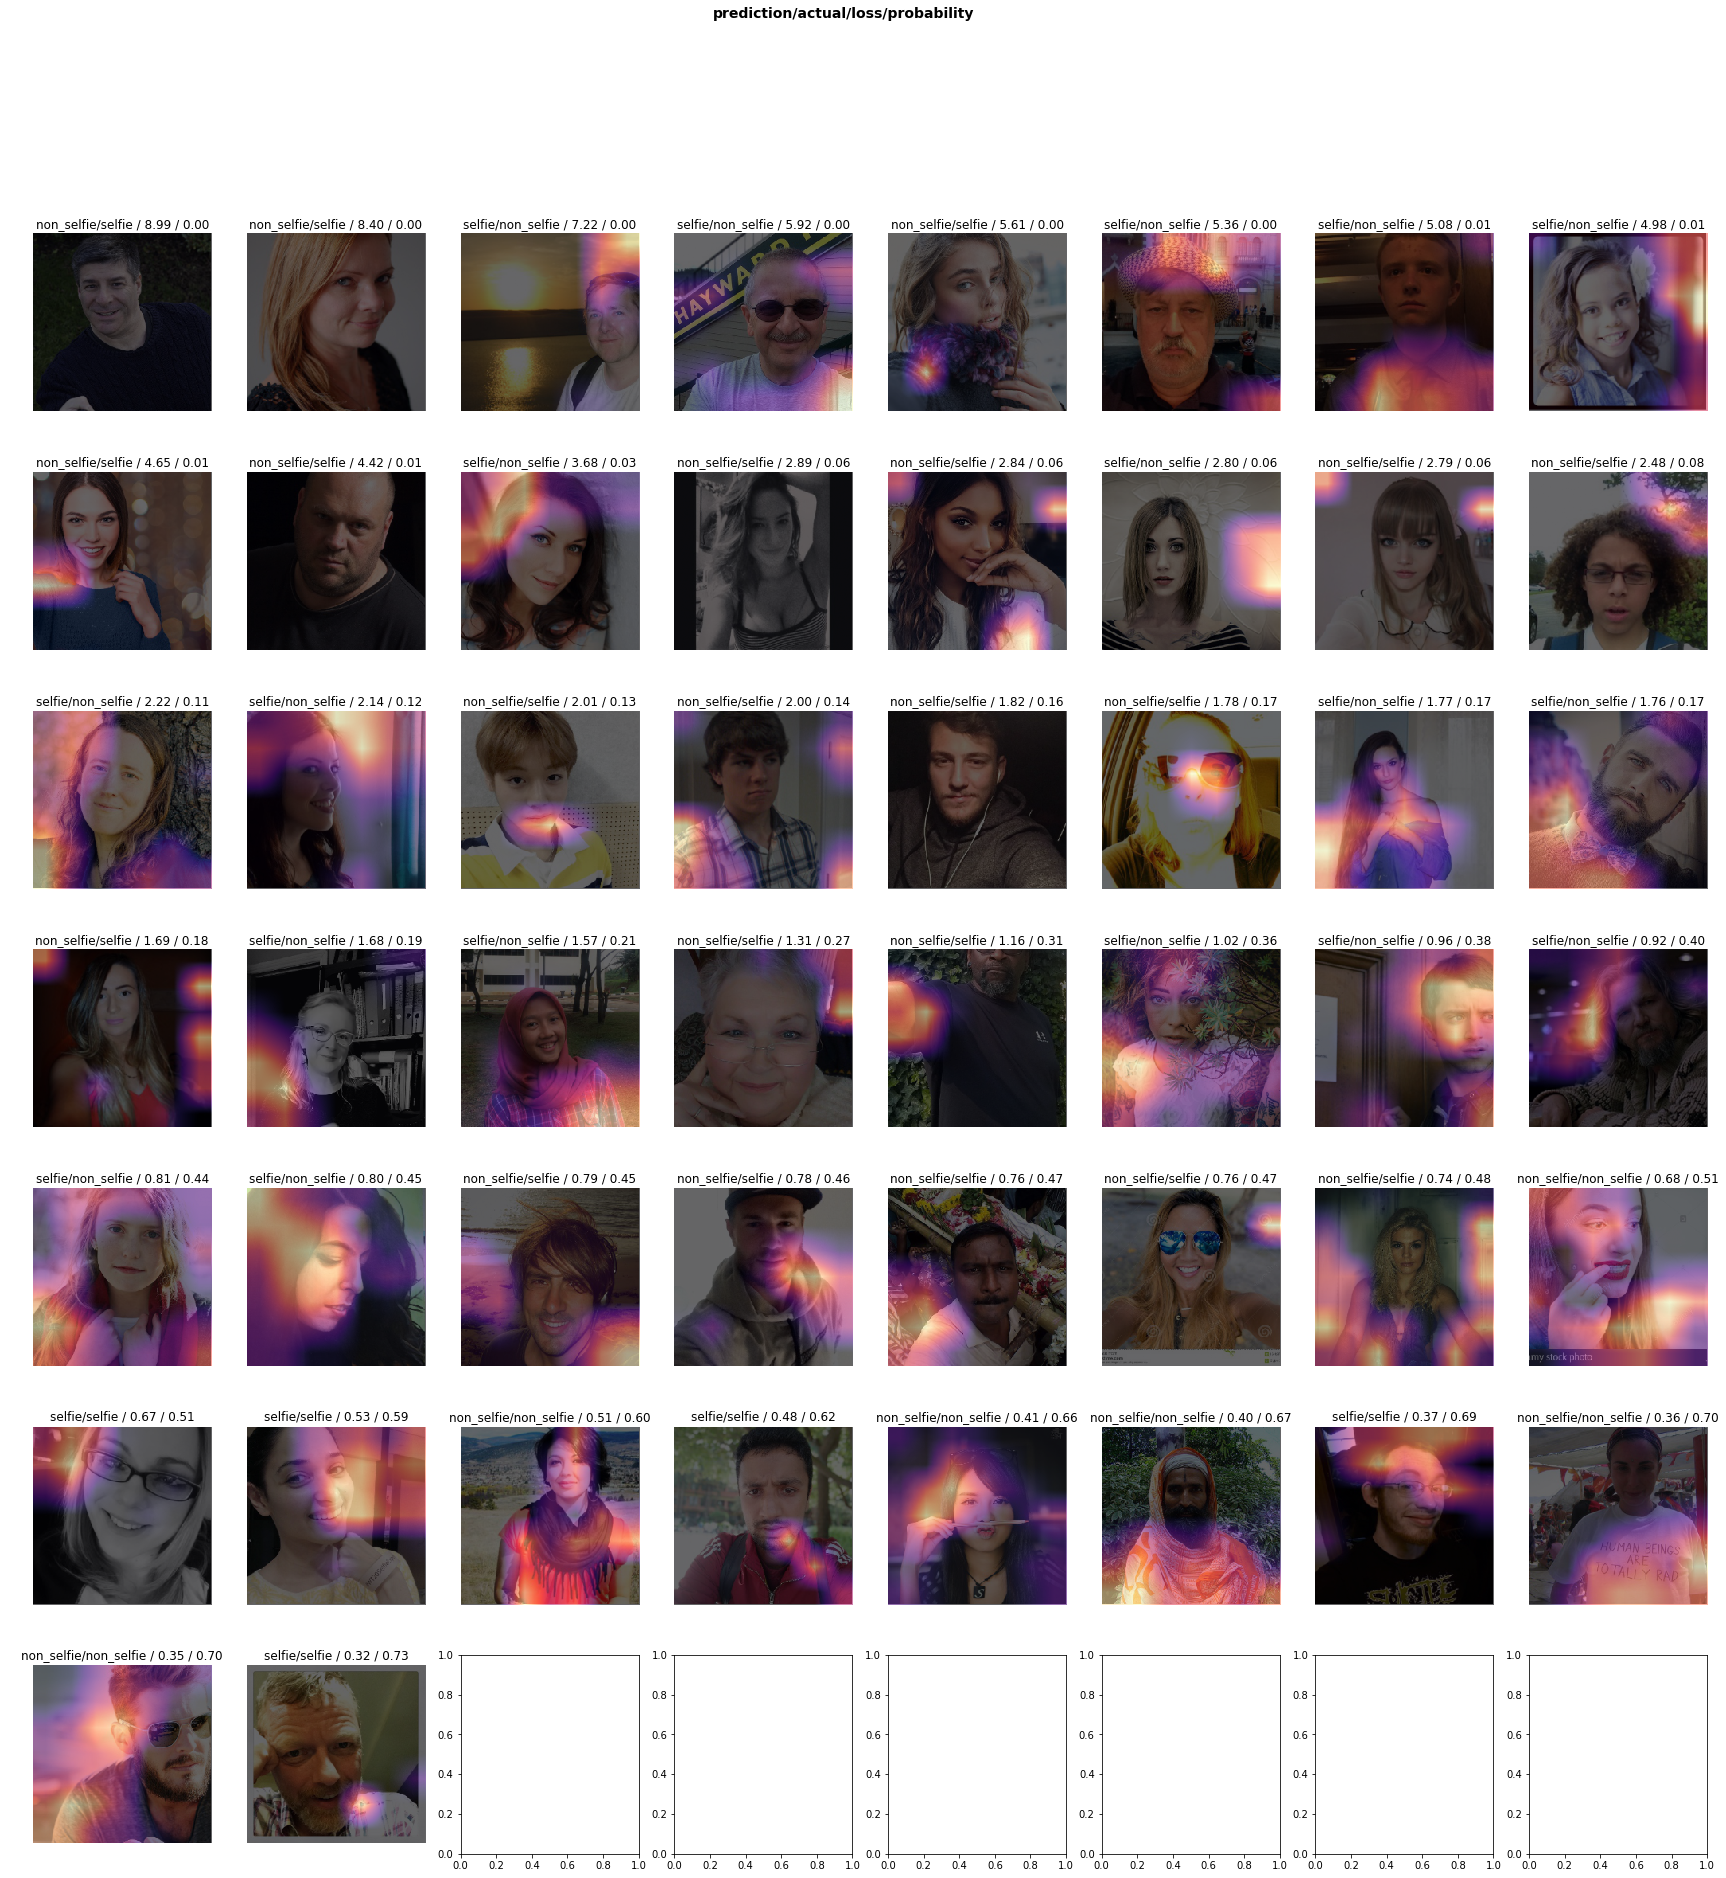

In [32]:
interp.plot_top_losses(50, figsize=(30,30))

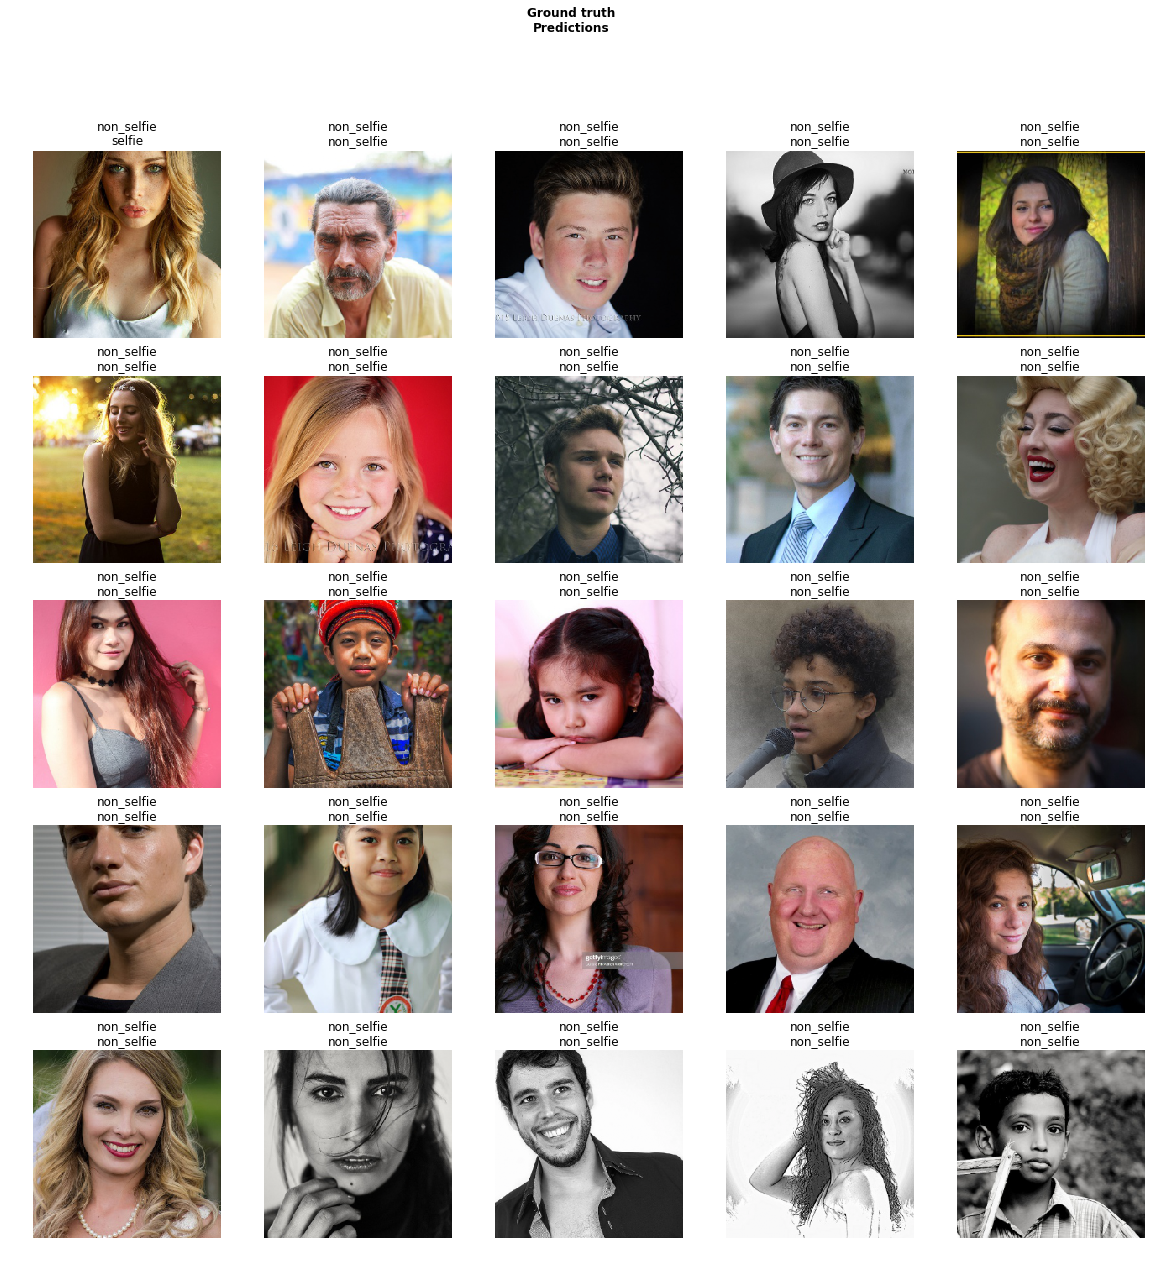

In [33]:
learn.show_results(data.valid_dl)

In [34]:
project_data_basepath = pathlib.Path('/disks/data/paper_projects/selfie_detection/data')
path = (project_data_basepath/'DS_merged/data').resolve()

data_test = (ImageList.from_folder(path)
        .split_by_folder(train='train', valid='test')
        .label_from_folder()
        .transform(get_transforms())
        .databunch()
        .normalize(imagenet_stats)
       ) 

You can deactivate this warning by passing `no_check=True`.


/home/tarik/anaconda3/envs/project_selfie/lib/python3.7/site-packages/fastai/basic_data.py:269: UserWarning: It's not possible to collate samples of your dataset together in a batch.
Shapes of the inputs/targets:
[[torch.Size([3, 388, 300]), torch.Size([3, 300, 300]), torch.Size([3, 300, 400]), torch.Size([3, 300, 449]), torch.Size([3, 300, 598]), torch.Size([3, 450, 300]), torch.Size([3, 300, 403]), torch.Size([3, 300, 300]), torch.Size([3, 300, 300]), torch.Size([3, 450, 300]), torch.Size([3, 422, 300]), torch.Size([3, 300, 407]), torch.Size([3, 449, 300]), torch.Size([3, 400, 300]), torch.Size([3, 421, 300]), torch.Size([3, 300, 300]), torch.Size([3, 300, 300]), torch.Size([3, 400, 300]), torch.Size([3, 300, 400]), torch.Size([3, 300, 300]), torch.Size([3, 533, 300]), torch.Size([3, 300, 300]), torch.Size([3, 300, 534]), torch.Size([3, 300, 533]), torch.Size([3, 399, 300]), torch.Size([3, 300, 300]), torch.Size([3, 300, 300]), torch.Size([3, 400, 300]), torch.Size([3, 300, 446]), to

In [35]:
data_test.classes, data_test.c, len(data_test.train_ds), len(data_test.valid_ds)

(['non_selfie', 'selfie'], 2, 3120, 15826)

In [36]:
res = learn.validate(dl = data_test.valid_dl, metrics=[error_rate, accuracy])

In [37]:
res #=> loss, error_rate, accuracy [metric]

[0.11415973, tensor(0.0422), tensor(0.9578)]

In [39]:
# interp = ClassificationInterpretation.from_learner(learn, ds_type = DatasetType.Valid)
# interp.plot_confusion_matrix()

In [41]:
# learn.show_results(data_test.valid_dl)